# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


SKEWNESS AND OUTLIERS ARE PRESENT

MEAN,MEADIAN AND MODE ARE NOR EQUAL IN ANY CASE SO NO NORMAL DISTRIBUTION

DEVIATION PRESENT

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

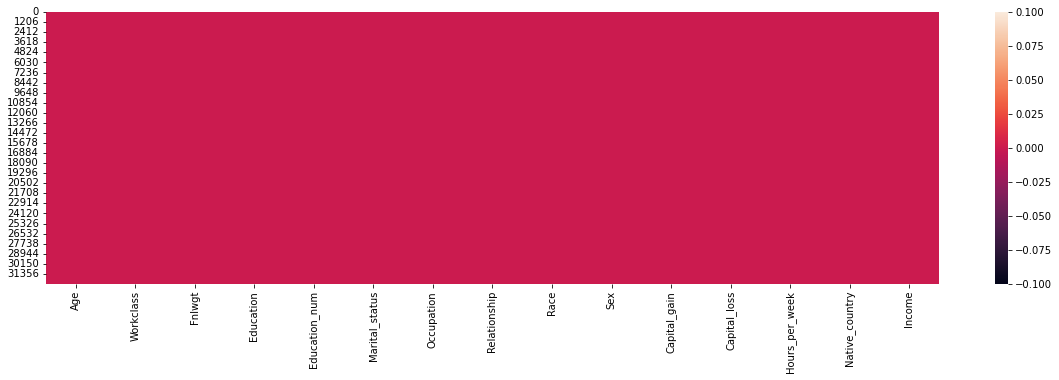

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull())

In [8]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
df['Workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Marital_status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [11]:
df['Occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Relationship'].value_counts()


 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [13]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:title={'center':'Education vs Income'}, xlabel='Education', ylabel='count'>

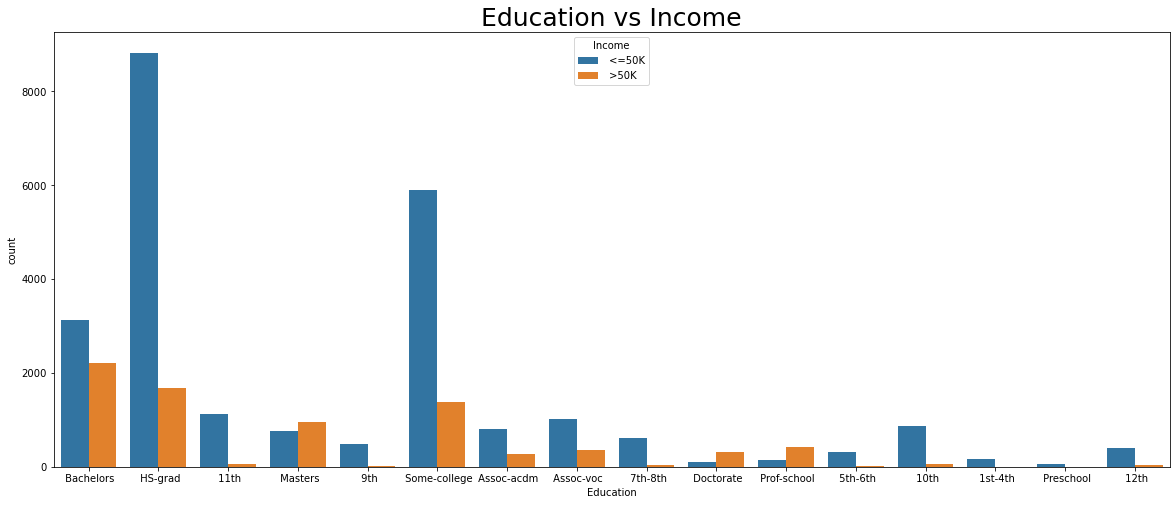

In [14]:
plt.figure(figsize=(20,8))

plt.title("Education vs Income",fontsize= 25,
        fontweight =180,
        color = 'black',)

sns.countplot(data=df,x='Education',hue='Income')


HIGHER THE EDUCATION HIGH WOULD BE SALARY.

SALARY ABOVE $50K IS HIGH FOR BACHELORS DEGREE QUALIFICATION.

SALARY UNDER $50K IS HIGH FOR HS-GRADE AND SEMICOLLEGE.



([<matplotlib.patches.Wedge at 0x18e91f52df0>,
 [Text(-0.6673064134972162, 0.9365907059679177, ' Self-emp-not-inc'),
  Text(-0.10051167438755519, -1.1455991459982025, ' Private'),
  Text(0.4046893694714646, -1.0764415981542095, ' State-gov'),
  Text(0.7743253718673131, -0.8502471514110161, ' Federal-gov'),
  Text(0.9923408292248291, -0.5811709547571856, ' Local-gov'),
  Text(1.09965668939836, -0.33653404799728553, ' ?'),
  Text(1.144629726854097, -0.1110080555721775, ' Self-emp-inc'),
  Text(1.1499958030882595, -0.0031069083329557643, ' Without-pay'),
  Text(1.1499997376652222, -0.0007767688976228629, ' Never-worked')],
 [Text(-0.377173190237557, 0.5293773555470839, '69.71%'),
  Text(-0.05681094639296597, -0.6475125607815925, '7.80%'),
  Text(0.22873746970126257, -0.6084235120002053, '6.43%'),
  Text(0.43766216670761166, -0.48057447688448734, '5.64%'),
  Text(0.5608882947792512, -0.32848793094971357, '3.98%'),
  Text(0.6215450853121164, -0.19021489669411787, '3.43%'),
  Text(0.64696462

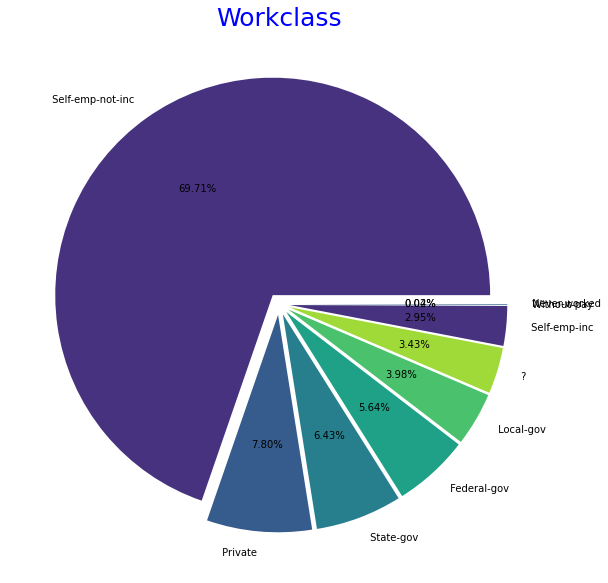

In [15]:
plt.figure(figsize=(20,10))


colors=sns.color_palette('viridis')
labels=df['Workclass'].dropna().unique()

plt.title('Workclass',fontsize= 25,
        fontweight =200,
        color = 'blue')
plt.pie(df['Workclass'].value_counts(),explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')


self emp not inc are the highest in nos in workclass followed by private and state gov.



<AxesSubplot:title={'center':'Workclass vs Income'}, xlabel='Workclass', ylabel='count'>

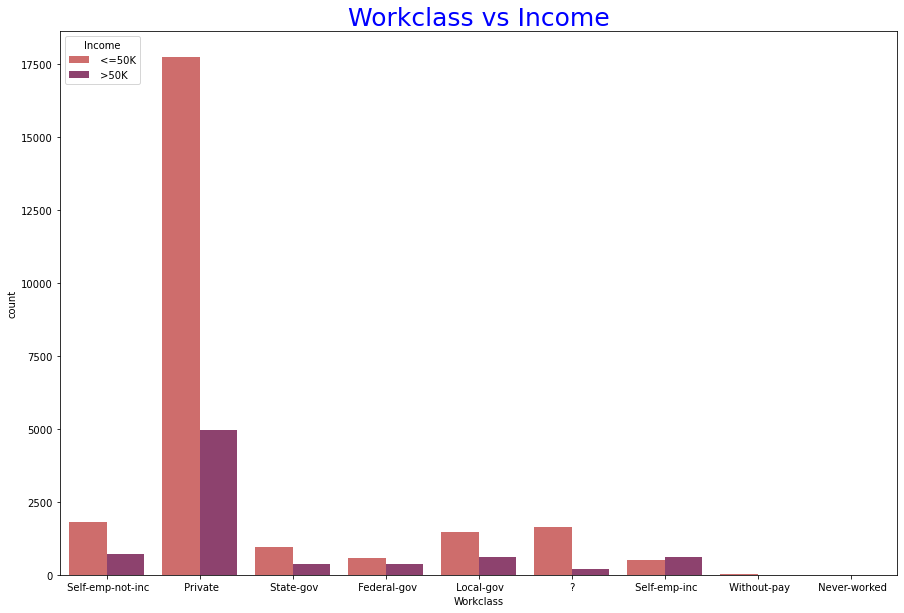

In [16]:
plt.figure(figsize=(15,10))

plt.title('Workclass vs Income',fontsize= 25,
        fontweight =200,
        color = 'blue',)



sns.countplot(x="Workclass", data=df,palette='flare',hue='Income')


PRIVATE WORKERS ARE HAVING SALARY HIGH ABOVE



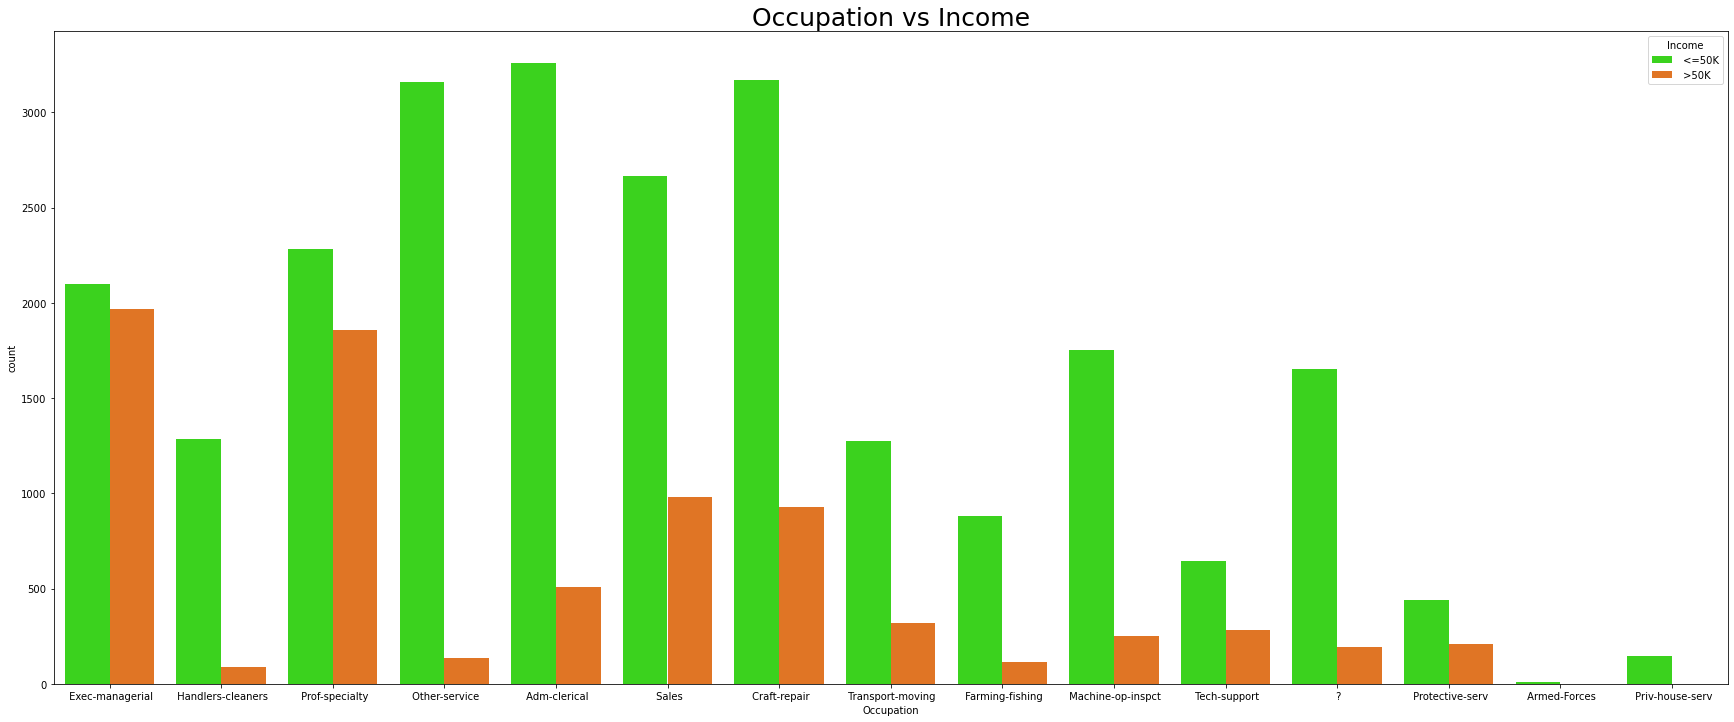

In [17]:
plt.figure(figsize=(30,12))
sns.countplot(data=df,x='Occupation',palette='gist_ncar',hue='Income')
plt.title('Occupation vs Income',fontsize= 25,
        fontweight =200,
        color = 'black',)
plt.show()


SALARY ABOVE $50K IS HIGH FOR EXEC MANAGERIAL AND PROF-SPECIALITY

AND IS NULL FOR ARMED FORCES AND SERVANTS

HENCE SALARY ALSO DEPENDS UPON POST AND DEMAND ON PARTICULAR SECTOR

<AxesSubplot:xlabel='Income', ylabel='Count'>

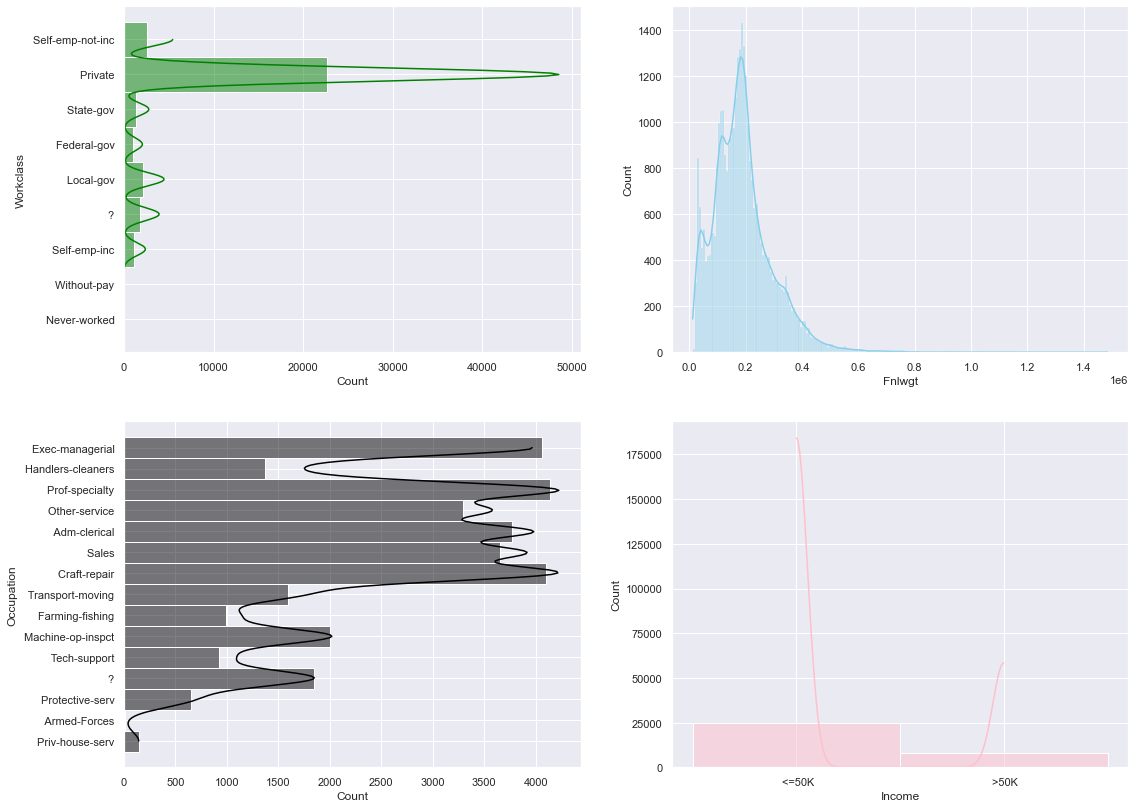

In [18]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

sns.histplot(data=df, y="Workclass", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Fnlwgt", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, y="Occupation", kde=True, ax=axs[1, 0], color='black')
sns.histplot(data=df, x="Income", kde=True, ax=axs[1, 1] ,color='pink')

RIGHT SKEWNESS PRESENT IN FINAL WEIGHT

PRIVATE WORKCLASS ARE HIGH COMPARED TO OTHERS

INCOME ABOVE 50K ARE LESS THAN UNDER 50K.



<AxesSubplot:title={'center':'Relationship vs Income'}, xlabel='Relationship', ylabel='count'>

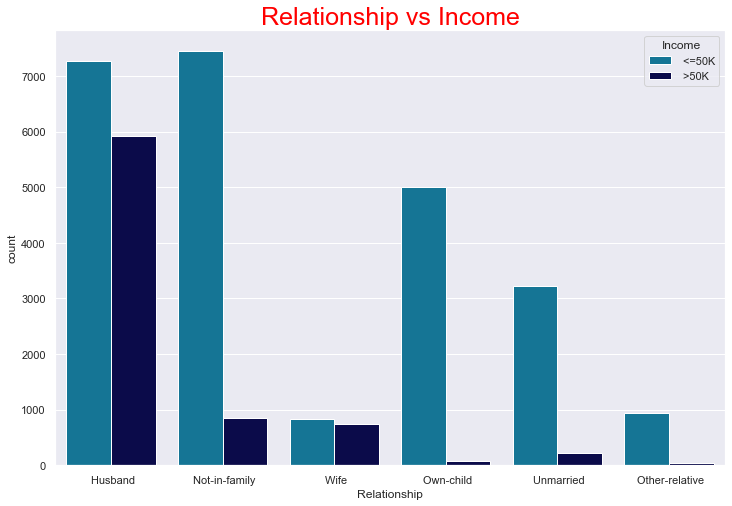

In [19]:
plt.figure(figsize=(12,8))

plt.title("Relationship vs Income",fontsize= 25,
        fontweight =200,
        color = 'red',)


sns.countplot(data=df,x='Relationship',hue='Income',palette='ocean_r')

HUSBAND ARE EARNING MORE THAN ANY.

MANY OWN CHILD ARE EARNING UNDER 50K



<AxesSubplot:title={'center':'Marital_status vs Income'}, xlabel='Marital_status', ylabel='count'>

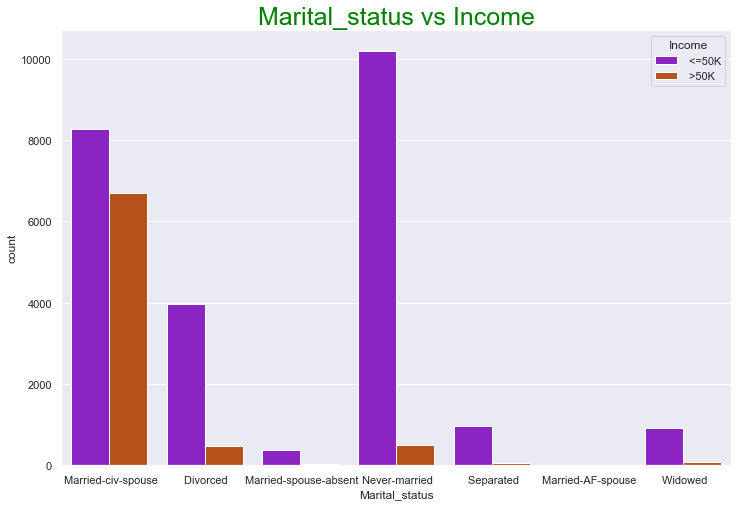

In [20]:
plt.figure(figsize=(12,8))

plt.title("Marital_status vs Income",fontsize= 25,
        fontweight =200,
        color = 'green',)


sns.countplot(data=df,x='Marital_status',hue='Income',palette="gnuplot")


MAJORITY ARE EARNING UNDER 50K WHO NEVER MARRIED BUT ARE HAPPY.

MARRIED CIV SPOUSE ARE HIGH IN EARNING IN BOTH THE CASES.

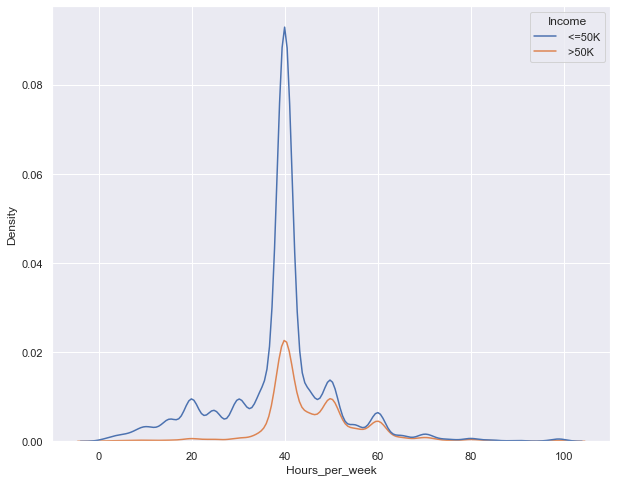

In [21]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df,x='Hours_per_week',hue='Income')
plt.show()


MAXIMUM 40 HOURS PER WEEK ARE HIGHEST IN NUMBER.

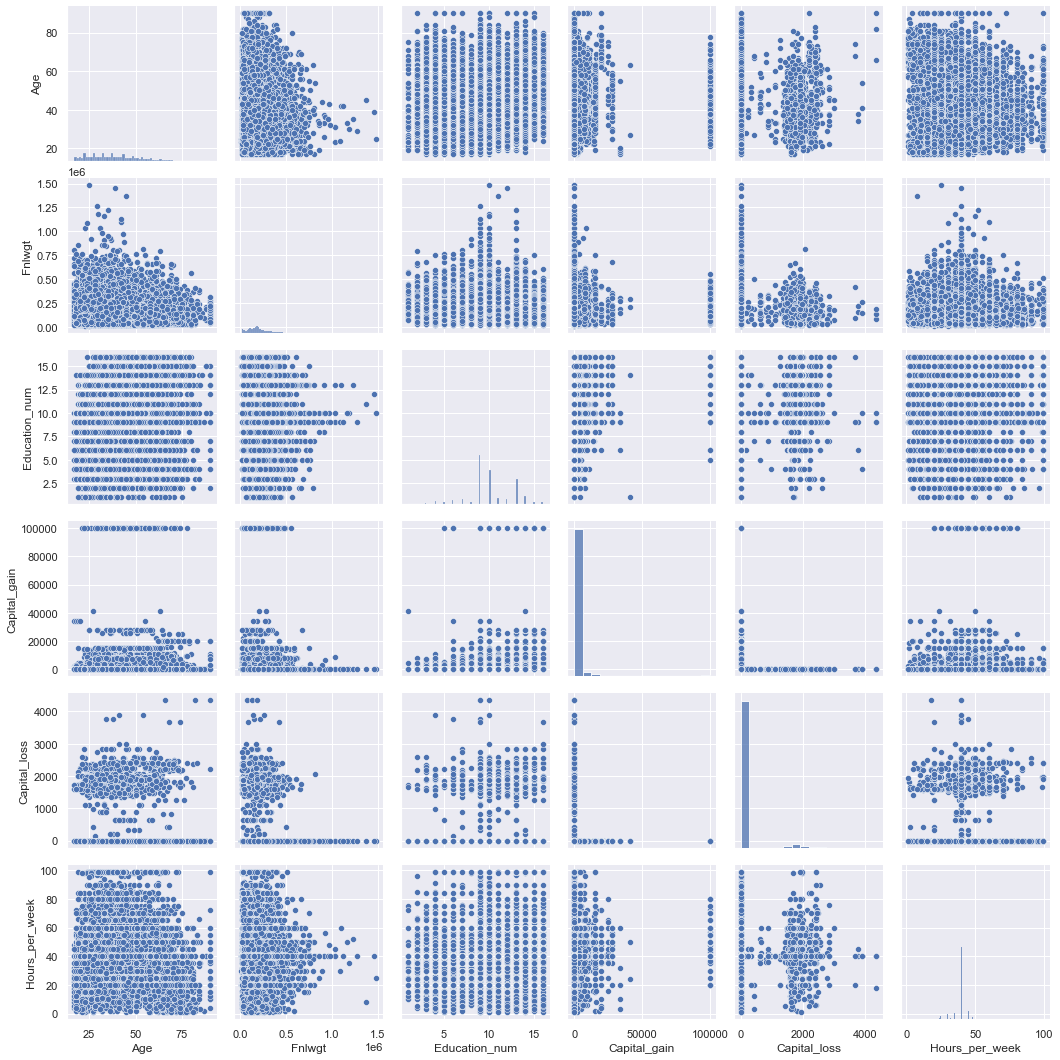

In [22]:
sns.pairplot(df)


20 TO 50 AGE ARE WORKING FOR MORE HOURS THAN OLD AGE.

EDUCATION NUM ARE HAVING SOME OUTLIERS WITH RESPECT TO AGE.

CAPITAL LOSS ARE INVERSELY PROPOTIONAL TO CAPITAL GAIN.

In [23]:
Income = df[["Income"]]
Income = pd.get_dummies(Income, drop_first= True)

df = pd.concat([df, Income], axis = 1)
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Income_ >50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


# Correlation


In [24]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income_ >50K
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income_ >50K,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


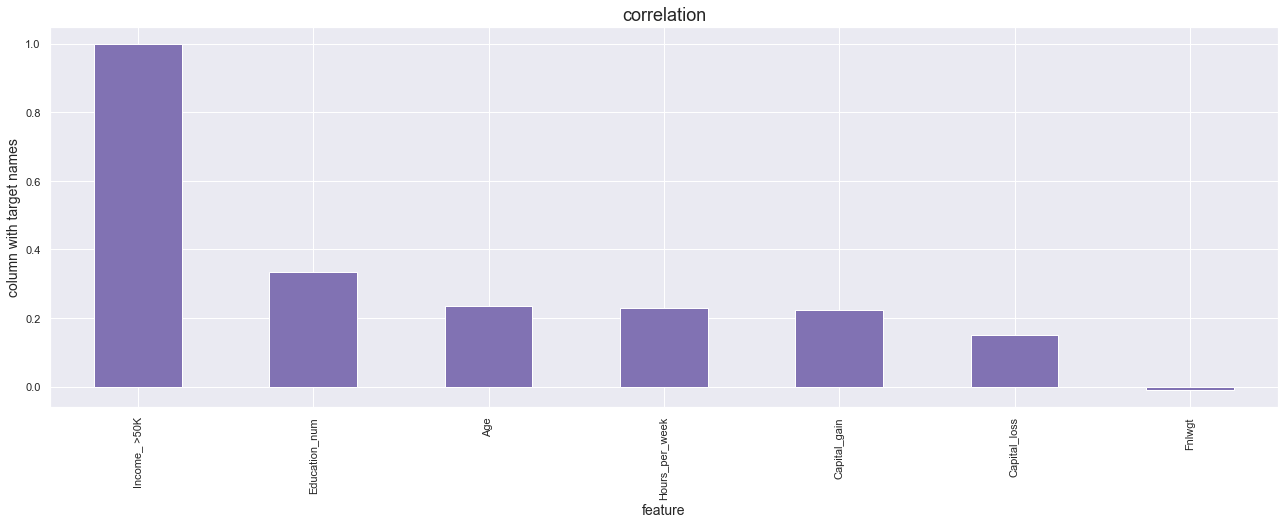

In [25]:
plt.figure(figsize=(22,7))
df.corr()['Income_ >50K'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


ALL ARE POSITIVELY CORRELATED

<AxesSubplot:>

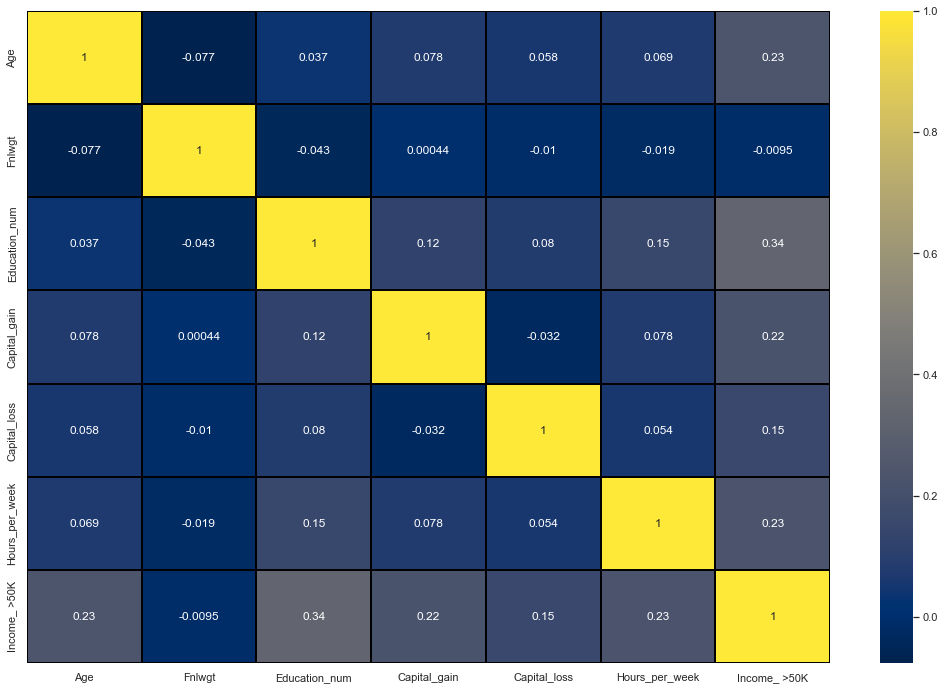

In [26]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='cividis',annot=True,linecolor='Black',linewidths=.2)

CAPITAL LOSS IS NEGATIVELY CORRELATED TO CAPITAL GAIN

HOURS PER WEEK IS DIRCTLY PROPOTIONAL TO INCOME ABOVE $50K.

# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case



In [27]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
Income_ >50K       uint8
dtype: object

In [28]:
# APLLYING LABEL ENCODER TO REST AS THEY ARE ORDINAL DATA

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [29]:
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Native_country'] = LE.fit_transform(df['Native_country'])

df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K,0


In [30]:
df.drop(["Income"], axis = 1, inplace = True)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


AS WE ONLY HAVE TO FIND SALARY ABOVE 50K, SO CONVERTED INTO ORDINAL DATA AND DROPPING INCOME.



# CHECKING OUTLIERS

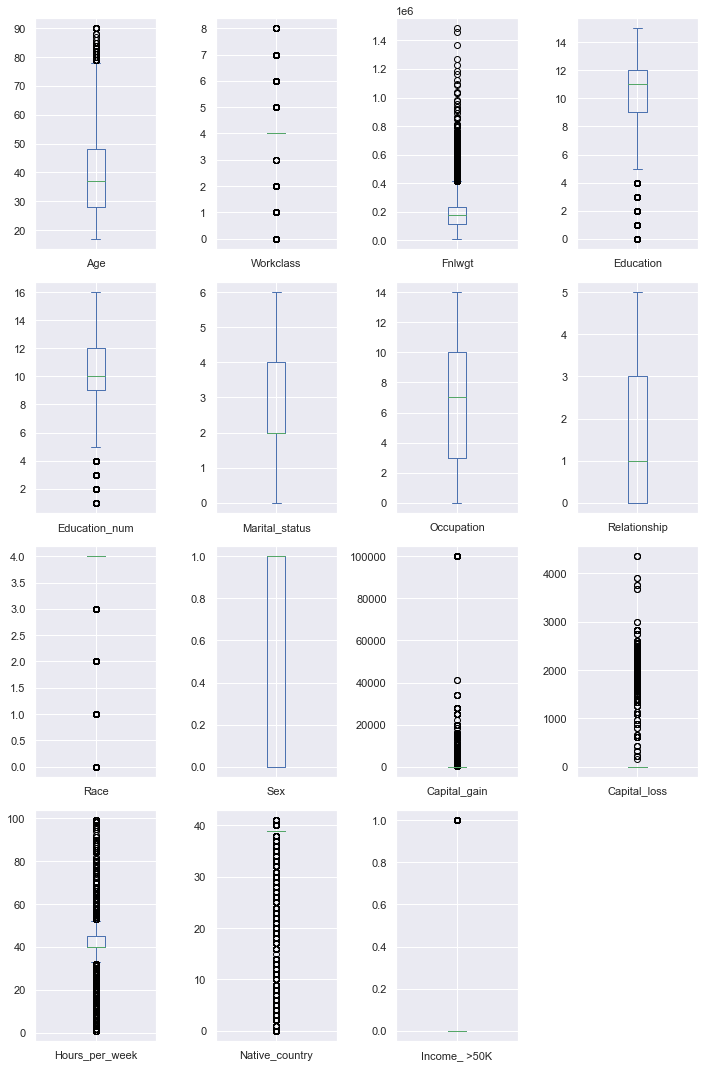

In [31]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.tight_layout()

# REMOVING OUTLIERS

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,0.837097,1.463883,1.008742,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.145914,0.216663,2.222120,0.291573,0.563210
1,0.042640,0.090121,0.245046,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
2,1.057031,0.090121,0.425770,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
3,0.775755,0.090121,1.408146,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.145914,0.216663,0.035430,4.054157,0.563210
4,0.115952,0.090121,0.898170,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.639710,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.145914,0.216663,0.197407,0.291573,0.563210
32556,0.103982,0.090121,0.335466,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,1.775537
32557,1.423589,0.090121,0.358811,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
32558,1.215624,0.090121,0.110927,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.145914,0.216663,1.655200,0.291573,0.563210


In [33]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [34]:
df1=df[(z<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_ >50K
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# Percentage loss

In [35]:
loss_percent=(32560-29813)/29813*100
print(loss_percent,'%')

9.214101231006607 %


# Separating Dataset


In [36]:
#independent column
x=df1.drop(['Income_ >50K'],axis=1)
#target
y=df1['Income_ >50K']


In [37]:
x.shape


(27417, 14)

In [38]:
y.shape

(27417,)

# Skewness check


In [39]:
df1.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income_ >50K       1.324919
dtype: float64

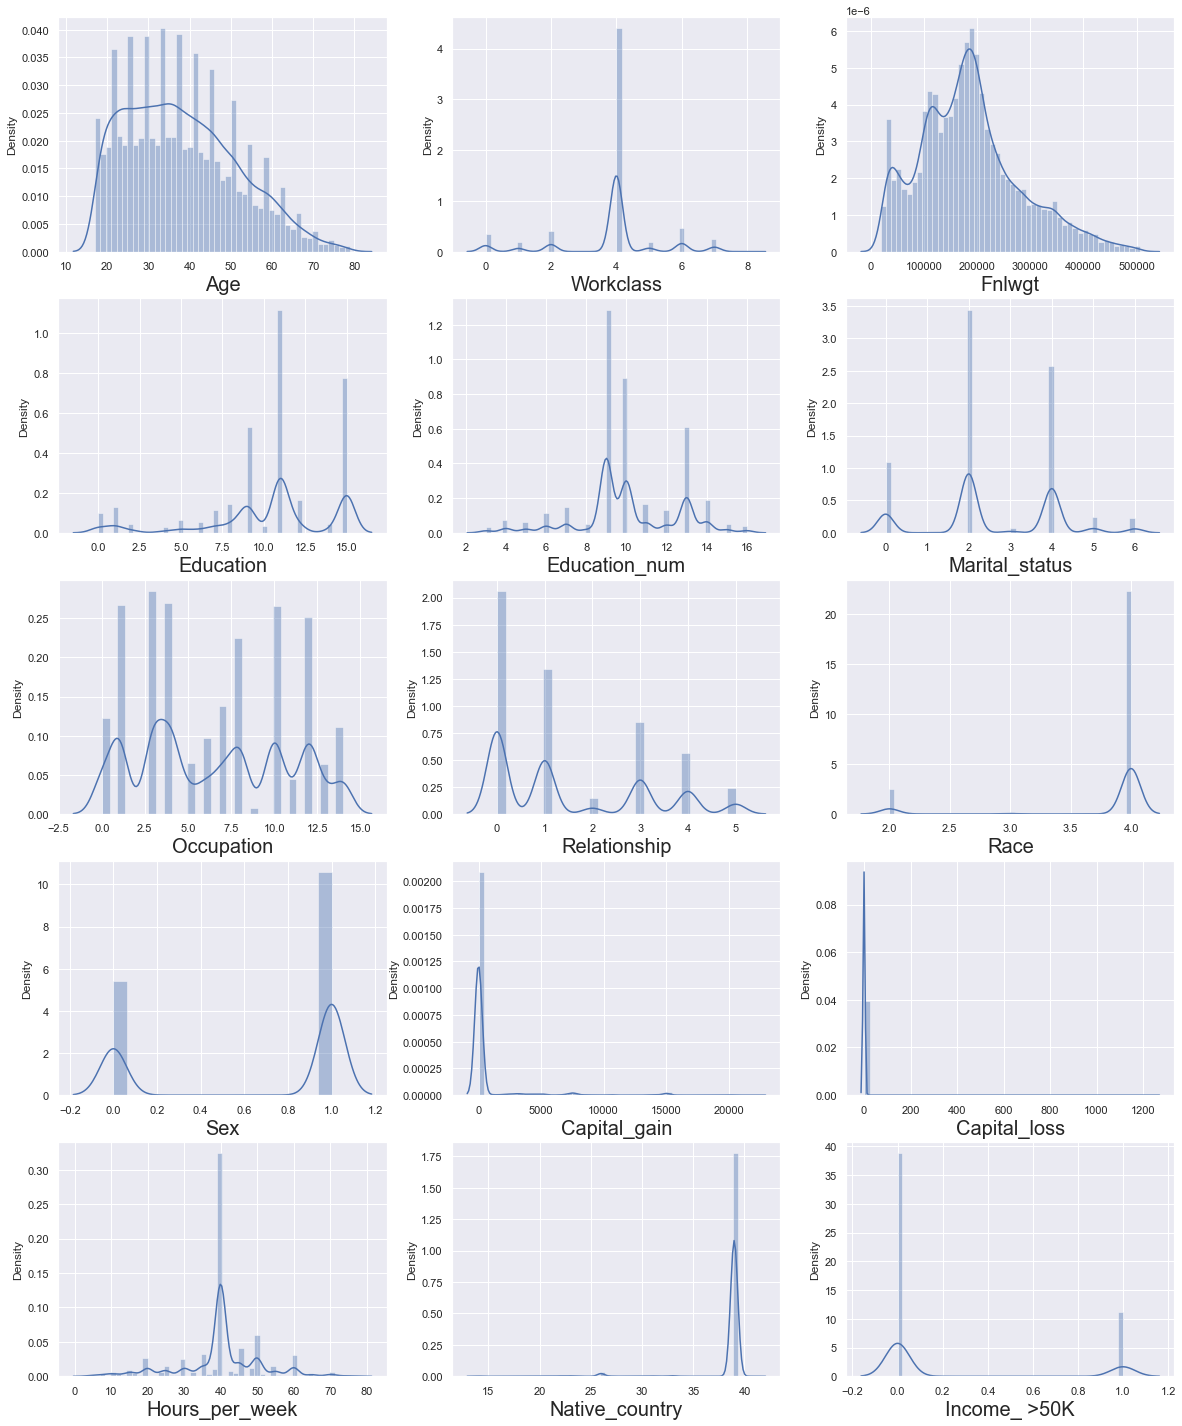

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


ALMOST ALL COLUMNS ARE HAVING SKEWNESS

In [41]:
from sklearn.preprocessing import power_transform
df1=power_transform(x,method='yeo-johnson')
df1

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.88273868,  1.47439128, -1.08632701, ..., -0.03745297,
        -2.4121897 ,  0.1938942 ],
       [-0.01173679,  0.09284389,  0.31020881, ..., -0.03745297,
         0.00820029,  0.1938942 ],
       [ 1.10635755,  0.09284389,  0.51150794, ..., -0.03745297,
         0.00820029,  0.1938942 ],
       ...,
       [ 1.47905566,  0.09284389, -0.3623994 , ..., -0.03745297,
         0.00820029,  0.1938942 ],
       [-1.20437075,  0.09284389,  0.16082005, ..., -0.03745297,
        -1.78468118,  0.1938942 ],
       [ 1.03181793,  0.78361759,  1.07299269, ..., -0.03745297,
         0.00820029,  0.1938942 ]])

# Splitting the DataFrame and Model selection


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=141)


# 1)LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))


Accuracy Score is
 0.8270888594164456
Confusion Matrix
 [[4432  258]
 [ 785  557]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4690
           1       0.68      0.42      0.52      1342

    accuracy                           0.83      6032
   macro avg       0.77      0.68      0.71      6032
weighted avg       0.81      0.83      0.81      6032



CROSS VALIDATION

In [46]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 82.87924160756674 and Accuracy score is 82.70888594164457
At cross fold 3 the Cross Val score is 82.91570923149871 and Accuracy score is 82.70888594164457
At cross fold 4 the Cross Val score is 82.90112818849413 and Accuracy score is 82.70888594164457
At cross fold 5 the Cross Val score is 82.90112945084687 and Accuracy score is 82.70888594164457
At cross fold 6 the Cross Val score is 82.85371926593113 and Accuracy score is 82.70888594164457
At cross fold 7 the Cross Val score is 82.90478657891805 and Accuracy score is 82.70888594164457
At cross fold 8 the Cross Val score is 82.90844438716636 and Accuracy score is 82.70888594164457
At cross fold 9 the Cross Val score is 82.86831852400474 and Accuracy score is 82.70888594164457


# 2) DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))


Accuracy score
 0.8098474801061007
Confusion Matrix
 [[4119  571]
 [ 576  766]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4690
           1       0.57      0.57      0.57      1342

    accuracy                           0.81      6032
   macro avg       0.73      0.72      0.72      6032
weighted avg       0.81      0.81      0.81      6032



CROSS VALIDATION

In [48]:
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 80.650695807429 and Accuracy score is 80.98474801061008
At cross fold 3 the Cross Val score is 80.26406973775396 and Accuracy score is 80.98474801061008
At cross fold 4 the Cross Val score is 80.57409708418814 and Accuracy score is 80.98474801061008
At cross fold 5 the Cross Val score is 80.62516088119594 and Accuracy score is 80.98474801061008
At cross fold 6 the Cross Val score is 80.67258595370218 and Accuracy score is 80.98474801061008
At cross fold 7 the Cross Val score is 80.70541773315337 and Accuracy score is 80.98474801061008
At cross fold 8 the Cross Val score is 80.76377735458584 and Accuracy score is 80.98474801061008
At cross fold 9 the Cross Val score is 80.71269524225522 and Accuracy score is 80.98474801061008


# 3) RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.8556034482758621
Confusion Matrix
 [[4390  300]
 [ 571  771]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4690
           1       0.72      0.57      0.64      1342

    accuracy                           0.86      6032
   macro avg       0.80      0.76      0.77      6032
weighted avg       0.85      0.86      0.85      6032



CROSS VALIDATION



In [50]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 85.17344223355514 and Accuracy score is 85.5603448275862
At cross fold 3 the Cross Val score is 85.3521537732064 and Accuracy score is 85.5603448275862
At cross fold 4 the Cross Val score is 85.24638404807405 and Accuracy score is 85.5603448275862
At cross fold 5 the Cross Val score is 85.08590773178233 and Accuracy score is 85.5603448275862
At cross fold 6 the Cross Val score is 85.1880294356778 and Accuracy score is 85.5603448275862
At cross fold 7 the Cross Val score is 85.1880500391887 and Accuracy score is 85.5603448275862
At cross fold 8 the Cross Val score is 85.27559646284789 and Accuracy score is 85.5603448275862
At cross fold 9 the Cross Val score is 85.19537867253165 and Accuracy score is 85.5603448275862


# 4) SUPPORT VECTOR CLASSIFIER


In [51]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8511273209549072
Confusion Matrix
 [[4478  212]
 [ 686  656]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4690
           1       0.76      0.49      0.59      1342

    accuracy                           0.85      6032
   macro avg       0.81      0.72      0.75      6032
weighted avg       0.84      0.85      0.84      6032



In [52]:
test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 84.99471607973506 and Accuracy score is 85.11273209549071
At cross fold 3 the Cross Val score is 85.02389028704819 and Accuracy score is 85.11273209549071
At cross fold 4 the Cross Val score is 85.0749640783268 and Accuracy score is 85.11273209549071
At cross fold 5 the Cross Val score is 84.98742682275152 and Accuracy score is 85.11273209549071
At cross fold 6 the Cross Val score is 85.03484539436558 and Accuracy score is 85.11273209549071
At cross fold 7 the Cross Val score is 85.0421406523015 and Accuracy score is 85.11273209549071
At cross fold 8 the Cross Val score is 85.08592406924352 and Accuracy score is 85.11273209549071
At cross fold 9 the Cross Val score is 85.05308446890115 and Accuracy score is 85.11273209549071


# 5) GradientBoostingClassifier

In [53]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))

Accuracy score
 0.865550397877984
Confusion Matrix
 [[4483  207]
 [ 604  738]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4690
           1       0.78      0.55      0.65      1342

    accuracy                           0.87      6032
   macro avg       0.83      0.75      0.78      6032
weighted avg       0.86      0.87      0.86      6032



CROSS VALIDATION

In [54]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 86.34789018768818 and Accuracy score is 86.5550397877984
At cross fold 3 the Cross Val score is 86.31870737133895 and Accuracy score is 86.5550397877984
At cross fold 4 the Cross Val score is 86.30047843773764 and Accuracy score is 86.5550397877984
At cross fold 5 the Cross Val score is 86.38437911598119 and Accuracy score is 86.5550397877984
At cross fold 6 the Cross Val score is 86.31873793820947 and Accuracy score is 86.5550397877984
At cross fold 7 the Cross Val score is 86.35884651014608 and Accuracy score is 86.5550397877984
At cross fold 8 the Cross Val score is 86.38805466337571 and Accuracy score is 86.5550397877984
At cross fold 9 the Cross Val score is 86.42086459049465 and Accuracy score is 86.5550397877984


# 6) ExtraTreesClassifier


In [55]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


Accuracy score
 0.8411803713527851
Confusion Matrix
 [[4314  376]
 [ 582  760]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4690
           1       0.67      0.57      0.61      1342

    accuracy                           0.84      6032
   macro avg       0.78      0.74      0.76      6032
weighted avg       0.83      0.84      0.84      6032



CROSS VALIDATION

In [56]:
test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 84.39655450957852 and Accuracy score is 84.11803713527851
At cross fold 3 the Cross Val score is 84.524200313674 and Accuracy score is 84.11803713527851
At cross fold 4 the Cross Val score is 84.5424522770116 and Accuracy score is 84.11803713527851
At cross fold 5 the Cross Val score is 84.42209079905226 and Accuracy score is 84.11803713527851
At cross fold 6 the Cross Val score is 84.38925614042817 and Accuracy score is 84.11803713527851
At cross fold 7 the Cross Val score is 84.54244894265777 and Accuracy score is 84.11803713527851
At cross fold 8 the Cross Val score is 84.39293640419498 and Accuracy score is 84.11803713527851
At cross fold 9 the Cross Val score is 84.37469958562897 and Accuracy score is 84.11803713527851


# 7)KNeighborsClassifier


In [57]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))


Accuracy score
 0.8362068965517241
Confusion Matrix
 [[4290  400]
 [ 588  754]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4690
           1       0.65      0.56      0.60      1342

    accuracy                           0.84      6032
   macro avg       0.77      0.74      0.75      6032
weighted avg       0.83      0.84      0.83      6032



CROSS VALIDATION



In [58]:
test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 83.43364349303714 and Accuracy score is 83.62068965517241
At cross fold 3 the Cross Val score is 83.73636794689426 and Accuracy score is 83.62068965517241
At cross fold 4 the Cross Val score is 83.71814166345814 and Accuracy score is 83.62068965517241
At cross fold 5 the Cross Val score is 83.59414810821008 and Accuracy score is 83.62068965517241
At cross fold 6 the Cross Val score is 83.75828191731962 and Accuracy score is 83.62068965517241
At cross fold 7 the Cross Val score is 83.75097478128633 and Accuracy score is 83.62068965517241
At cross fold 8 the Cross Val score is 83.72182206542253 and Accuracy score is 83.62068965517241
At cross fold 9 the Cross Val score is 83.73640786214771 and Accuracy score is 83.62068965517241


# HYPER PARAMETER TUNING

In [59]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt'],
           'max_depth':[4,5]}

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 5, 'max_features': 'auto'}

In [60]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))


Accuracy score
 0.8706896551724138
Confusion Matrix
 [[4446  244]
 [ 536  806]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4690
           1       0.77      0.60      0.67      1342

    accuracy                           0.87      6032
   macro avg       0.83      0.77      0.80      6032
weighted avg       0.86      0.87      0.86      6032



# GRADIENT BOOSTING CLASSIFIER IS THE BEST

# ROC AUC plot

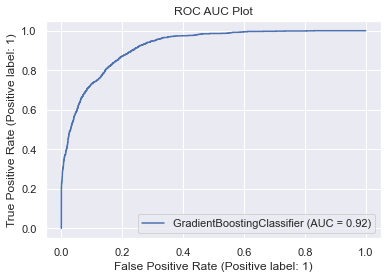

In [61]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()


accuracy score=87.14% and auc=92%

# Final Prediction Submission


In [62]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gcv.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df


,Original,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
6027,0,0
6028,0,0
6029,0,0
6030,0,0


# Saving the best Model


In [63]:
# save the model to disk
import pickle
filename = 'census_income_project.pkl'
pickle.dump(gcv.best_estimator_, open(filename, 'wb'))

In [64]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)


0.8706896551724138
